<a href="https://colab.research.google.com/github/TheLastGimbus/Roll-API-Tensorflow-Training/blob/master/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First try!

Let's import stuff!

In [0]:
%tensorflow_version 2.x
!pip install -q tf-hub-nightly==0.8.0.dev201911110007
!pip install -q git+https://github.com/tensorflow/examples

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# Stuff for re-training image classification model
from tensorflow_examples.lite.model_customization.core.data_util.image_dataloader import ImageClassifierDataLoader
from tensorflow_examples.lite.model_customization.core.task import image_classifier
from tensorflow_examples.lite.model_customization.core.task.model_spec import efficientnet_b0_spec
from tensorflow_examples.lite.model_customization.core.task.model_spec import ImageModelSpec


TensorFlow 2.x selected.
     |████████████████████████████████| 92kB 2.8MB/s 


Get dice images from my google drive:

In [0]:
images_path = tf.keras.utils.get_file(
    'dice_pics',
    'https://drive.google.com/uc?export=download&id=1vnrSfdQLZMXJOd9_11rH6RC_JJoNzyHa',
    extract=True
)

8658944/Unknown - 2s 0us/step



Get data with this cool library:



In [0]:
dice_data = ImageClassifierDataLoader.from_folder('/root/.keras/datasets/classes')

INFO:tensorflow:Load image with size: 559, num_label: 7, labels: 1, 2, 3, 4, 5, 6, moving.


Show some examples

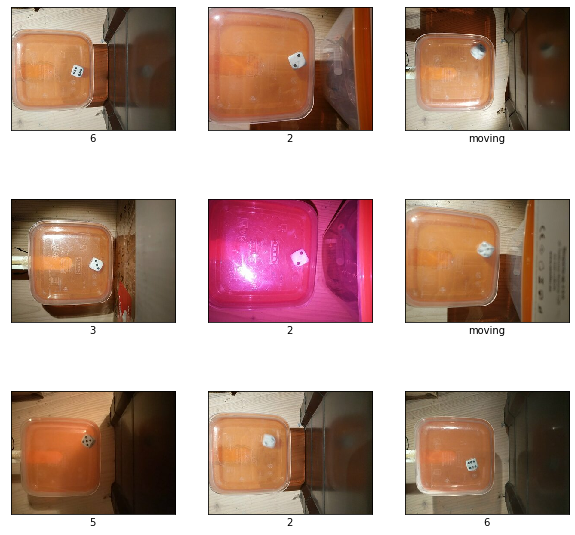

In [0]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(dice_data.dataset.take(9)):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(dice_data.index_to_label[label.numpy()])
plt.show()

Now simply create and train the model using 'cool library'

In [0]:
model = image_classifier.create(dice_data, epochs=25)  # TPUs, THANK YOU GOOGLE, VERY COOL

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   multiple                  2257984   
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  8967      
Total params: 2,266,951
Trainable params: 8,967
Non-trainable params: 2,257,984
_________________________________________________________________
None
INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Train for 14 steps, validate for 1 steps
Epoch 1/25
14/14 [==============================] - 21s 1s/step - loss: 2.3416 - accuracy: 0.1562 - val_loss: 2.1679 - val_accuracy: 0.0938
Epoch 2/25
14/14 [==============================] - 17s 1s/step - loss: 2.0781 - accuracy: 0.2076 - val_loss: 2.0350 - val_accuracy: 0.1562
Epoch 3/25
14/14 [==============================] - 17s 1s/step - loss: 1.8213 - accuracy: 0.3438 - val_loss: 1.8073 - val_accuracy: 0.3125
Epoch 4/25
14/14 [==============================] - 17s 1s/step - loss: 1.7448 - accuracy: 0.3393 - val_loss: 1.7786 - val_accuracy: 0.3438
Epoch 5/25
14/14 [==============================] - 17s 1s/step - loss: 1.6014 - accuracy: 0.4129 - val_loss: 1.7384 - val_accuracy: 0.3438
Epoch 6/25
14/14 [==============================] - 17s 1s/step - loss: 1.5919 - accuracy: 0.4241 - val_loss: 1.7225 - val_accuracy: 0.3125
Epoch 7/25
14/14 [==============================] - 17s 1s/step - loss: 1.5630 - accuracy: 0.4129 - val_loss: 1.7228 - 

Crap, only 60% accuracy. Let's try something different...

In [0]:
model = image_classifier.create(dice_data, train_whole_model=True, shuffle=True, model_spec=efficientnet_b0_spec, epochs=35)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   multiple                  4049564   
_________________________________________________________________
dropout_3 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  8967      
Total params: 4,058,531
Trainable params: 8,967
Non-trainable params: 4,049,564
_________________________________________________________________
None
INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Train for 14 steps, validate for 1 steps
Epoch 1/35
14/14 [==============================] - 35s 2s/step - loss: 1.9964 - accuracy: 0.1429 - val_loss: 1.9382 - val_accuracy: 0.1250
Epoch 2/35
14/14 [==============================] - 30s 2s/step - loss: 1.9144 - accuracy: 0.2277 - val_loss: 1.9474 - val_accuracy: 0.1875
Epoch 3/35
14/14 [==============================] - 30s 2s/step - loss: 1.8127 - accuracy: 0.2969 - val_loss: 1.8636 - val_accuracy: 0.1250
Epoch 4/35
14/14 [==============================] - 30s 2s/step - loss: 1.7368 - accuracy: 0.3594 - val_loss: 1.8249 - val_accuracy: 0.2188
Epoch 5/35
14/14 [==============================] - 30s 2s/step - loss: 1.6851 - accuracy: 0.3996 - val_loss: 1.8173 - val_accuracy: 0.1875
Epoch 6/35
14/14 [==============================] - 30s 2s/step - loss: 1.6526 - accuracy: 0.4196 - val_loss: 1.7746 - val_accuracy: 0.2812
Epoch 7/35
14/14 [==============================] - 30s 2s/step - loss: 1.6026 - accuracy: 0.4442 - val_loss: 1.7302 - 

Still not a lot... let's just try to deploy this on my device and wish that model has low accuracy just because i've put a lot of low-quality images in dataset.

Just extract it:

In [0]:
model.export('dice_classifier.tflite', 'dice_labels.txt')

INFO:tensorflow:Export to tflite model dice_classifier.tflite, saved labels in dice_labels.txt.


INFO:tensorflow:Export to tflite model dice_classifier.tflite, saved labels in dice_labels.txt.


# Second attempt
I think previous attempt was pretty good, but i've set myself pretty high bar, by letting my dataset to include low quality, photos with very poor lighting. Now, I'll just focus on good photos, well croped etc.

Clean it to have fresh env

In [0]:
!rm -r /root/.keras/datasets/classes
!rm -r /root/.keras/datasets/dice_pics

Import new, clean and nice dataset. Also, i cropped images to 1:1 ratio.

In [0]:
images_path = tf.keras.utils.get_file(
    'dice_pics',
    'https://drive.google.com/uc?export=download&id=16lnvRl5SKL-EcTdIjkrArsttLfcW30P1',
    extract=True
)

9887744/Unknown - 2s 0us/step

In [0]:
dice_data = ImageClassifierDataLoader.from_folder('/root/.keras/datasets/classes')

INFO:tensorflow:Load image with size: 600, num_label: 7, labels: 1, 2, 3, 4, 5, 6, moving.


INFO:tensorflow:Load image with size: 600, num_label: 7, labels: 1, 2, 3, 4, 5, 6, moving.


See! They are nicer this time!

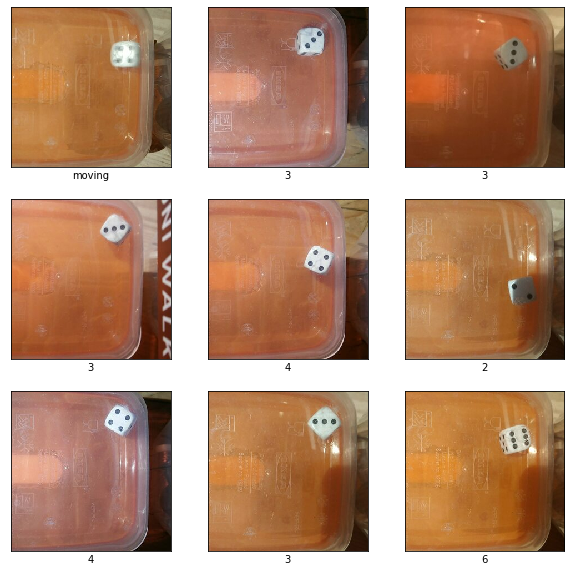

In [0]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(dice_data.dataset.take(9)):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(dice_data.index_to_label[label.numpy()])
plt.show()

Again, thank you googly-doodly soo much for this TPUs!!!

In [0]:
model = image_classifier.create(dice_data, epochs=35)  # TPUs, THANK YOU GOOGLE, VERY COOL

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   multiple                  2257984   
_________________________________________________________________
dropout_4 (Dropout)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  8967      
Total params: 2,266,951
Trainable params: 8,967
Non-trainable params: 2,257,984
_________________________________________________________________
None
INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Train for 15 steps, validate for 1 steps
Epoch 1/35
15/15 [==============================] - 22s 1s/step - loss: 2.2394 - accuracy: 0.2208 - val_loss: 2.0906 - val_accuracy: 0.3438
Epoch 2/35
15/15 [==============================] - 18s 1s/step - loss: 1.6174 - accuracy: 0.3896 - val_loss: 1.3177 - val_accuracy: 0.5938
Epoch 3/35
15/15 [==============================] - 18s 1s/step - loss: 1.2358 - accuracy: 0.5896 - val_loss: 1.2652 - val_accuracy: 0.5938
Epoch 4/35
15/15 [==============================] - 18s 1s/step - loss: 1.1113 - accuracy: 0.6958 - val_loss: 1.1703 - val_accuracy: 0.5938
Epoch 5/35
15/15 [==============================] - 18s 1s/step - loss: 1.0560 - accuracy: 0.6917 - val_loss: 1.1591 - val_accuracy: 0.6875
Epoch 6/35
15/15 [==============================] - 18s 1s/step - loss: 1.0161 - accuracy: 0.7167 - val_loss: 1.1015 - val_accuracy: 0.6562
Epoch 7/35
15/15 [==============================] - 18s 1s/step - loss: 0.9521 - accuracy: 0.7917 - val_loss: 1.0634 - 

### AND NOW WE ARE TALKING!
Now I don't know what val_accuracy is but I'm sure IT IS NOT IMPORTANT

Let's also try this cause why not:

In [0]:
model = image_classifier.create(dice_data, train_whole_model=True, shuffle=True, model_spec=efficientnet_b0_spec, epochs=35)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   multiple                  4049564   
_________________________________________________________________
dropout_5 (Dropout)          multiple                  0         
_________________________________________________________________
dense_5 (Dense)              multiple                  8967      
Total params: 4,058,531
Trainable params: 8,967
Non-trainable params: 4,049,564
_________________________________________________________________
None
INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Train for 15 steps, validate for 1 steps
Epoch 1/35
15/15 [==============================] - 37s 2s/step - loss: 1.8924 - accuracy: 0.2271 - val_loss: 1.8244 - val_accuracy: 0.2812
Epoch 2/35
15/15 [==============================] - 32s 2s/step - loss: 1.7368 - accuracy: 0.3542 - val_loss: 1.6169 - val_accuracy: 0.5000
Epoch 3/35
15/15 [==============================] - 32s 2s/step - loss: 1.5631 - accuracy: 0.4563 - val_loss: 1.5732 - val_accuracy: 0.4062
Epoch 4/35
15/15 [==============================] - 31s 2s/step - loss: 1.4475 - accuracy: 0.5167 - val_loss: 1.4462 - val_accuracy: 0.6562
Epoch 5/35
15/15 [==============================] - 32s 2s/step - loss: 1.3711 - accuracy: 0.5604 - val_loss: 1.3282 - val_accuracy: 0.6250
Epoch 6/35
15/15 [==============================] - 32s 2s/step - loss: 1.3154 - accuracy: 0.6146 - val_loss: 1.3199 - val_accuracy: 0.7188
Epoch 7/35
15/15 [==============================] - 32s 2s/step - loss: 1.2519 - accuracy: 0.6562 - val_loss: 1.2405 - 

Oookayy? So now we have a little smaller accuracy, but muuuch higher val_accuracy. I still don't know what this is, but I think it's good.

Okay let's just export it and test it in the wild:

In [0]:
model.export('dice_classifier.tflite', 'dice_labels.txt')

INFO:tensorflow:Export to tflite model dice_classifier.tflite, saved labels in dice_labels.txt.


INFO:tensorflow:Export to tflite model dice_classifier.tflite, saved labels in dice_labels.txt.
